In [1]:
# Exploratory Data Analysis

import pandas as pd
import numpy as np


In [66]:
df = pd.read_csv('./property_data.csv')
df.tail()

# standard missing values
df['ST_NUM']
df['ST_NUM'].isnull()
# df.info()

# non-standard missing values
df['NUM_BEDROOMS']
missing_values = ['--', 'na', 'n/a']
df = pd.read_csv('./property_data.csv', na_values=missing_values)



In [67]:
# df_filter.info()


# unexpected missing values
# Y N 12 X
df
# df['OWN_OCCUPIED'].isnull()

for index, row in enumerate(df['OWN_OCCUPIED']):
    # print()
    if row is not 'Y' and row is not 'N':
        df.loc[index, 'OWN_OCCUPIED'] = np.nan
        # df['OWN_OCCUPIED'][index] = np.nan
        
df['ST_NUM'].fillna(0, inplace=True)
# df.info()

# Summarizing missing values
df.isnull().sum()
df.isnull().sum().sum()
df.isnull().values.any()
df.loc[6]
df.loc[7, 'NUM_BEDROOMS'] = np.nan
df.loc[1, 'SQ_FT'] = np.nan
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,0.0,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,NaN,NaN,1,800.0
6,100007000.0,0.0,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,NaN,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


<AxesSubplot:xlabel='Date'>

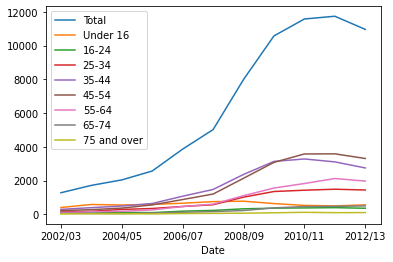

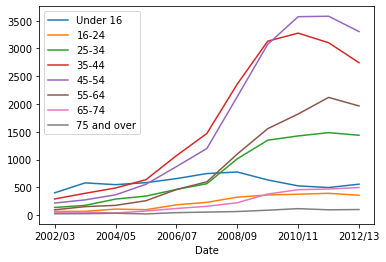

In [84]:
# Analyziing obesity in england
%matplotlib inline
data = pd.ExcelFile('./obes.xls')
data.sheet_names

data_age = data.parse('7.2', skiprows=4, skipfooter=14)

data_age.head()

data_age.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)
data_age

# Drop rows
# 1
# data_age.dropna(inplace=True)

# 2
data_age.drop(labels=0, inplace=True)

# Set index

data_age.set_index('Date', inplace=True)

data_age.plot()

# Drop Columns
data_age_minus_total = data_age.drop(labels='Total', axis=1)

data_age_minus_total.plot()

<AxesSubplot:xlabel='Date'>

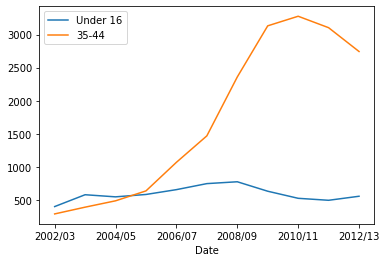

In [89]:
# data_age.info()

data_age['Under 16'].plot(label='Under 16', legend=True)
data_age['35-44'].plot(label='35-44', legend=True)

In [105]:
# time series
# by data type timestamp or datetime

opsd_daily = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/opsd_germany_daily.csv', parse_dates=True)


opsd_daily.shape
# opsd_daily.head()
# opsd_daily.info()

opsd_daily['Date'] = pd.to_datetime(opsd_daily['Date'])
# opsd_daily.info()
opsd_daily.set_index('Date', inplace=True)
opsd_daily




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         4383 non-null   datetime64[ns]
 1   Consumption  4383 non-null   float64       
 2   Wind         2920 non-null   float64       
 3   Solar        2188 non-null   float64       
 4   Wind+Solar   2187 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 171.3 KB


,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.18400,NaN,NaN,NaN
2006-01-02,1380.52100,NaN,NaN,NaN
2006-01-03,1442.53300,NaN,NaN,NaN
2006-01-04,1457.21700,NaN,NaN,NaN
2006-01-05,1477.13100,NaN,NaN,NaN
...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037
2017-12-28,1299.86398,506.424,14.162,520.586
2017-12-29,1295.08753,584.277,29.854,614.131


In [119]:
from datetime import datetime, timedelta
now = datetime.now()
now

delta = now - datetime(2020, 12, 31)
# delta.days
delta

date = datetime(2020,1, 31)
str(date)

date.strftime('%d-%m-%Y')

'31-01-2020'

In [136]:
opsd_daily_copy = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/opsd_germany_daily.csv')


opsd_daily_copy['Date'] = pd.to_datetime(opsd_daily_copy['Date'])
opsd_daily_copy['Date'] = [ datetime.strftime(x, '%d-%m-%Y') for x in opsd_daily_copy['Date'] ]
opsd_daily_copy.info()
# TODO: change format with same data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         4383 non-null   object 
 1   Consumption  4383 non-null   float64
 2   Wind         2920 non-null   float64
 3   Solar        2188 non-null   float64
 4   Wind+Solar   2187 non-null   float64
dtypes: float64(4), object(1)
memory usage: 171.3+ KB


In [154]:
# Extract new column from date
opsd_daily['Year'] = opsd_daily.index.year
opsd_daily['Month'] = opsd_daily.index.month
opsd_daily['Week'] = opsd_daily.index.weekday

opsd_daily.loc['2017-08-19']
opsd_daily.loc['2017-08-19': '2017-08-21']

opsd_daily.loc[opsd_daily.index.day % 2 == 0]

# TODO: add example from dataframe datetime

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Week
Date,,,,,,,
2006-01-02,1380.52100,NaN,NaN,NaN,2006,1,0
2006-01-04,1457.21700,NaN,NaN,NaN,2006,1,2
2006-01-06,1403.42700,NaN,NaN,NaN,2006,1,4
2006-01-08,1207.98500,NaN,NaN,NaN,2006,1,6
2006-01-10,1576.91100,NaN,NaN,NaN,2006,1,1
...,...,...,...,...,...,...,...
2017-12-22,1423.23782,228.773,10.065,238.838,2017,12,4
2017-12-24,1141.75730,812.422,9.949,822.371,2017,12,6
2017-12-26,1130.11683,717.453,30.923,748.376,2017,12,1


<AxesSubplot:xlabel='Date'>

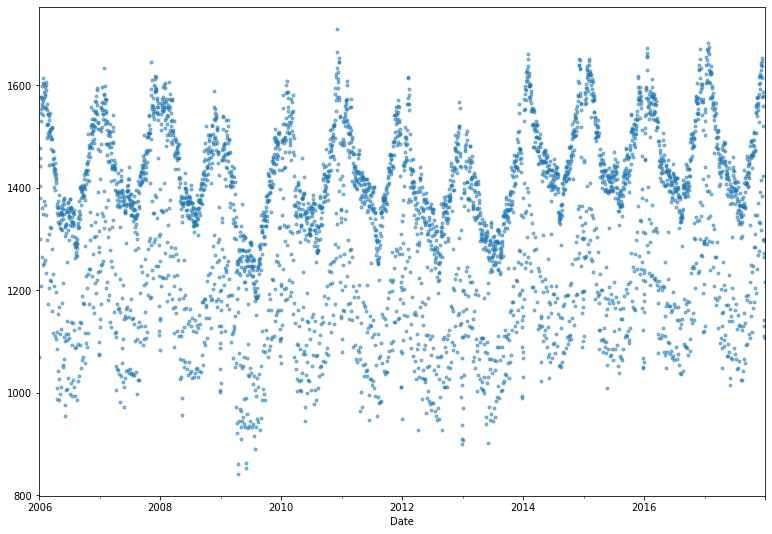

In [161]:
# opsd_daily['Consumption'].plot(linewidth=0.5)

opsd_daily['Consumption'].plot(marker='.', alpha=0.5, linestyle='None', figsize=(13, 9))

<AxesSubplot:xlabel='Date'>

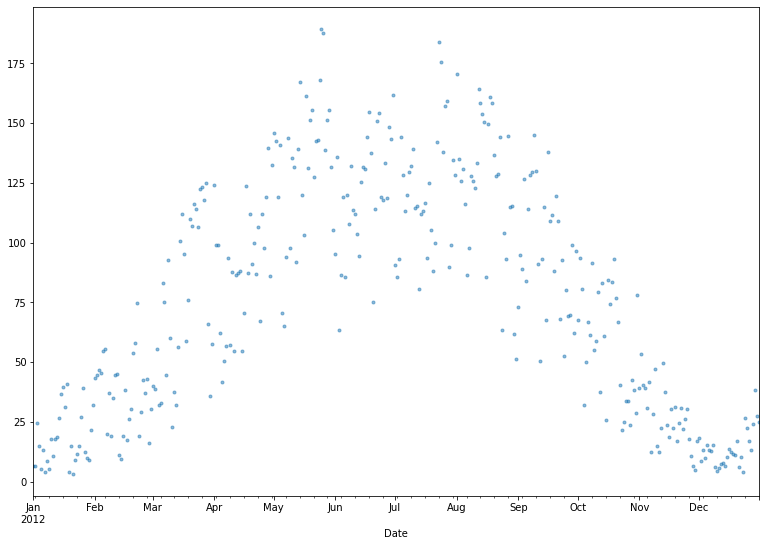

In [165]:
# opsd_daily.loc['2012-01-01':]['Solar'].plot(marker='.', alpha=0.5, linestyle='None', figsize=(13, 9))

# opsd_daily.loc['2012-01-01':'2012-12-31']['Solar'].plot(marker='.', alpha=0.5, linestyle='None', figsize=(13, 9))

opsd_daily.loc['2012']['Solar'].plot(marker='.', alpha=0.5, linestyle='None', figsize=(13, 9))


<AxesSubplot:xlabel='Date'>

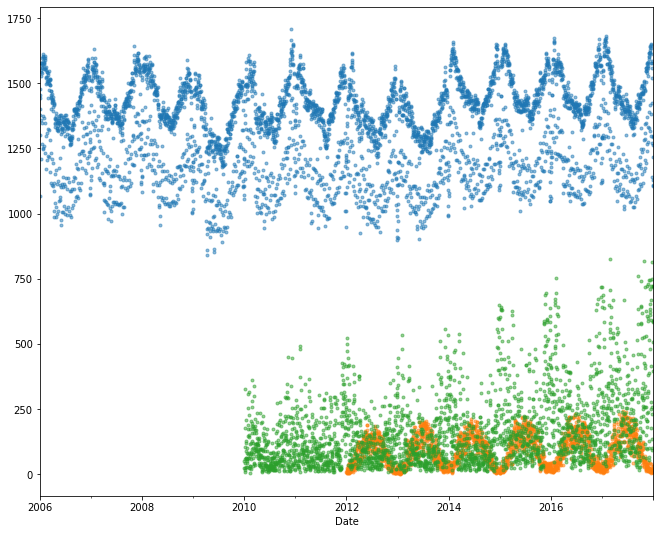

In [169]:
# opsd_daily.loc['2017', 'Consumption'].plot(figsize=(13, 9)).set_ylabel('Daily Consumption (Gwh)')

opsd_daily['Consumption'].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9))
opsd_daily['Solar'].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9))
opsd_daily['Wind'].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9))

<AxesSubplot:title={'center':'Consumption'}, xlabel='Week'>

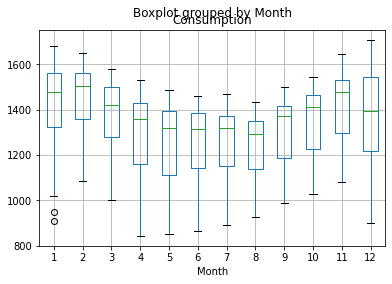

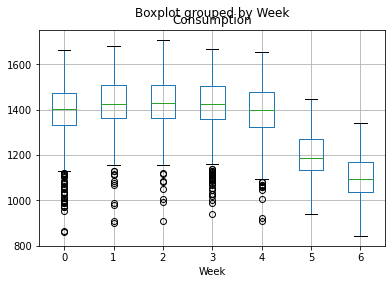

In [192]:
# opsd_daily.loc['2017']['Consumption'].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9))

opsd_daily.boxplot(column=['Consumption'], by='Month')
# opsd_daily.boxplot(column=['Solar'], by='Month')
# opsd_daily.boxplot(column=['Wind'], by='Month')

opsd_daily.boxplot(column=['Consumption'], by='Week')

<AxesSubplot:xlabel='Date'>

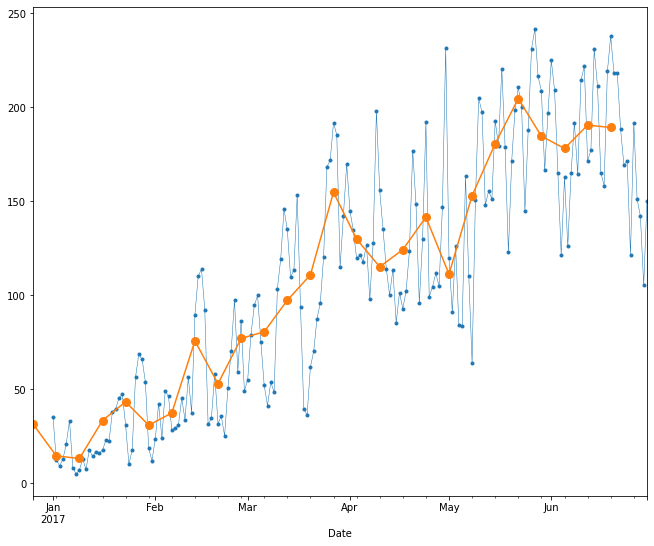

In [194]:
# Resampling by mean week

data_columns = ['Consumption', 'Wind', 'Solar', 'Wind+Solar']
opsd_weekly_mean = opsd_daily[data_columns].resample('W').mean()
opsd_weekly_mean.head(3)

start, end = '2017-01', '2017-06'
opsd_daily.loc[start:end, 'Solar'].plot(marker='.', linestyle='-', linewidth=0.5, figsize=(11, 9))
opsd_weekly_mean.loc[start:end, 'Solar'].plot(marker='o', markersize=8, linestyle='-', figsize=(11, 9))